In [1]:
# 💡 Core PyTorch & Vision
!pip install torch==2.1.0 torchvision==0.16.0

# 🤗 Transformers & its ecosystem
!pip install transformers==4.36.0 accelerate==0.25.0

# 🎞️ Video Loading
!pip install decord av

# 🔢 Numerical, Plotting & Image Handling
!pip install numpy==1.26.1 matplotlib Pillow

  Using cached torch-2.1.0-cp311-cp311-manylinux1_x86_64.whl.metadata (25 kB)
  Using cached torchvision-0.16.0-cp311-cp311-manylinux1_x86_64.whl.metadata (6.6 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.met

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/415 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/881 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/345M [00:00<?, ?B/s]

Model loaded successfully on cuda

Scene: trial_lie_016


/usr/local/lib/python3.11/dist-packages/transformers/feature_extraction_utils.py:141: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  return torch.tensor(value)


  Prediction: deceptive  True: deceptive  ✓
  Scene confidence: 99.94%
  Chunk‐level acc: 10/10 = 100.00%


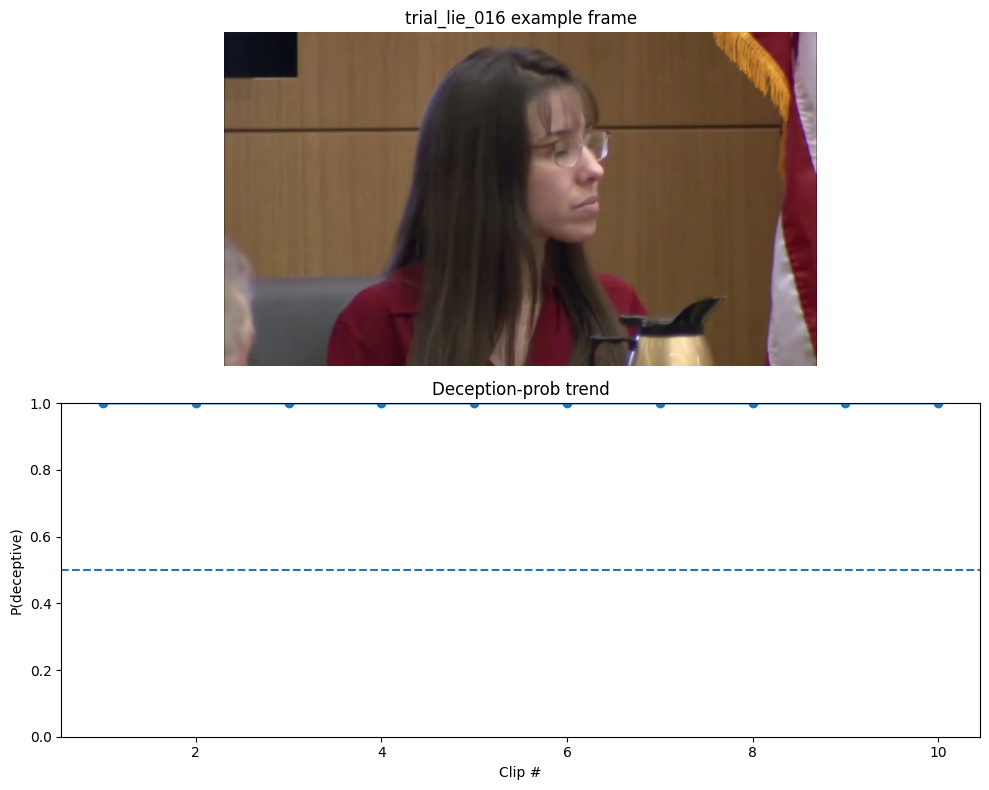


Scene: trial_lie_002
  Prediction: deceptive  True: deceptive  ✓
  Scene confidence: 99.73%
  Chunk‐level acc: 16/16 = 100.00%


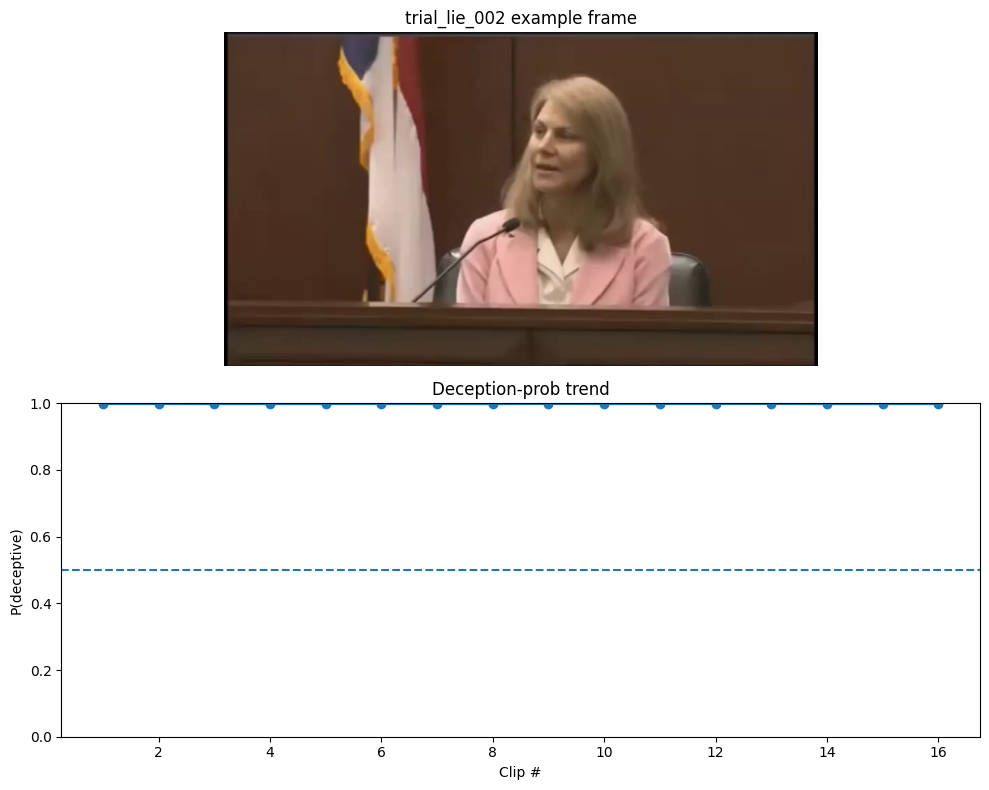


Scene: trial_lie_048
Error loading video /content/drive/MyDrive/deception_detection/test/trial_lie_048_012.mp4: Video has only 1 frames, need at least 16
  Prediction: deceptive  True: deceptive  ✓
  Scene confidence: 99.91%
  Chunk‐level acc: 12/12 = 100.00%


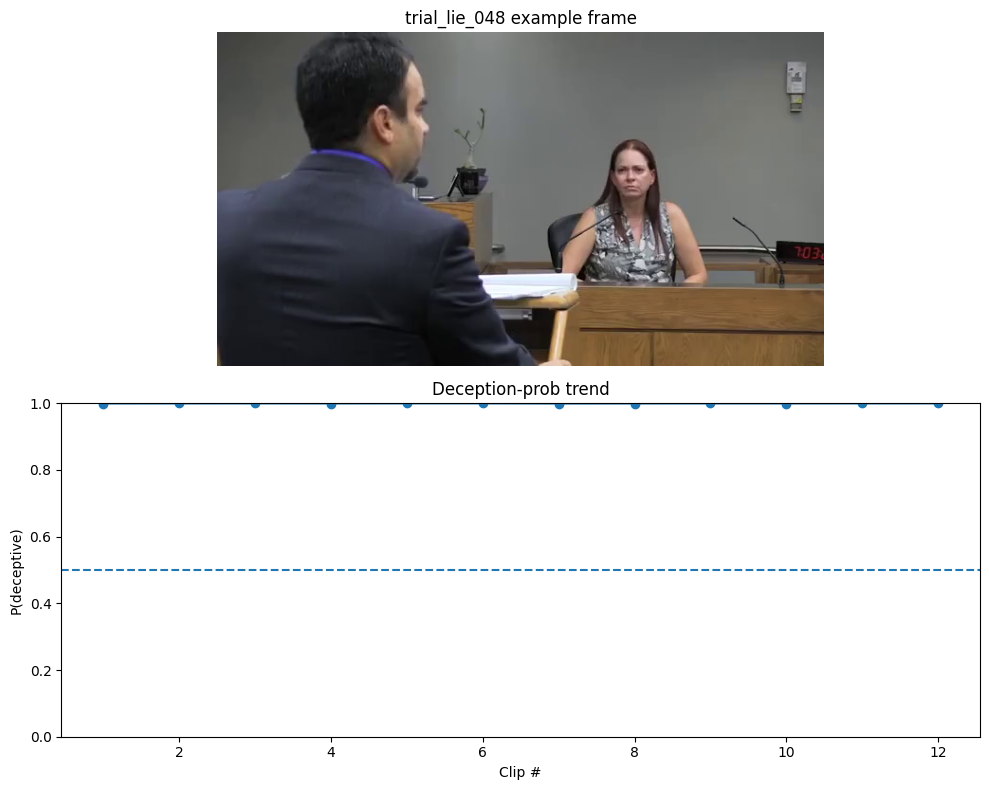


Scene: trial_lie_057
  Prediction: truthful  True: deceptive  ✗
  Scene confidence: 59.77%
  Chunk‐level acc: 2/5 = 40.00%


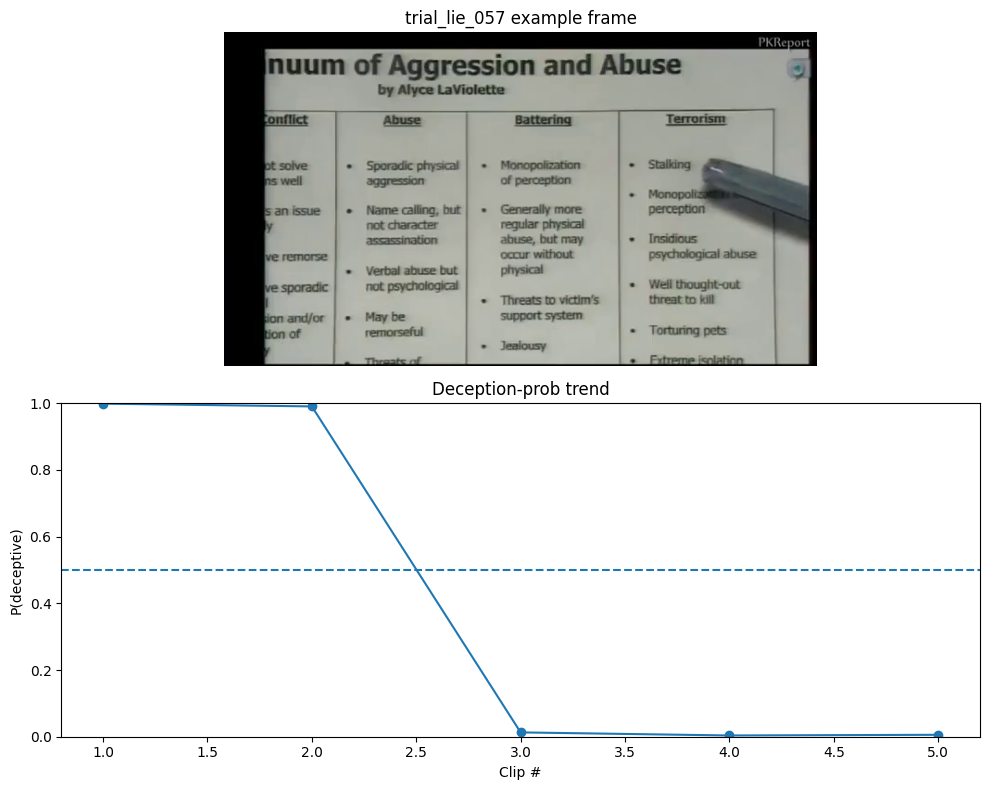


Scene: trial_lie_029
  Prediction: deceptive  True: deceptive  ✓
  Scene confidence: 99.94%
  Chunk‐level acc: 6/6 = 100.00%


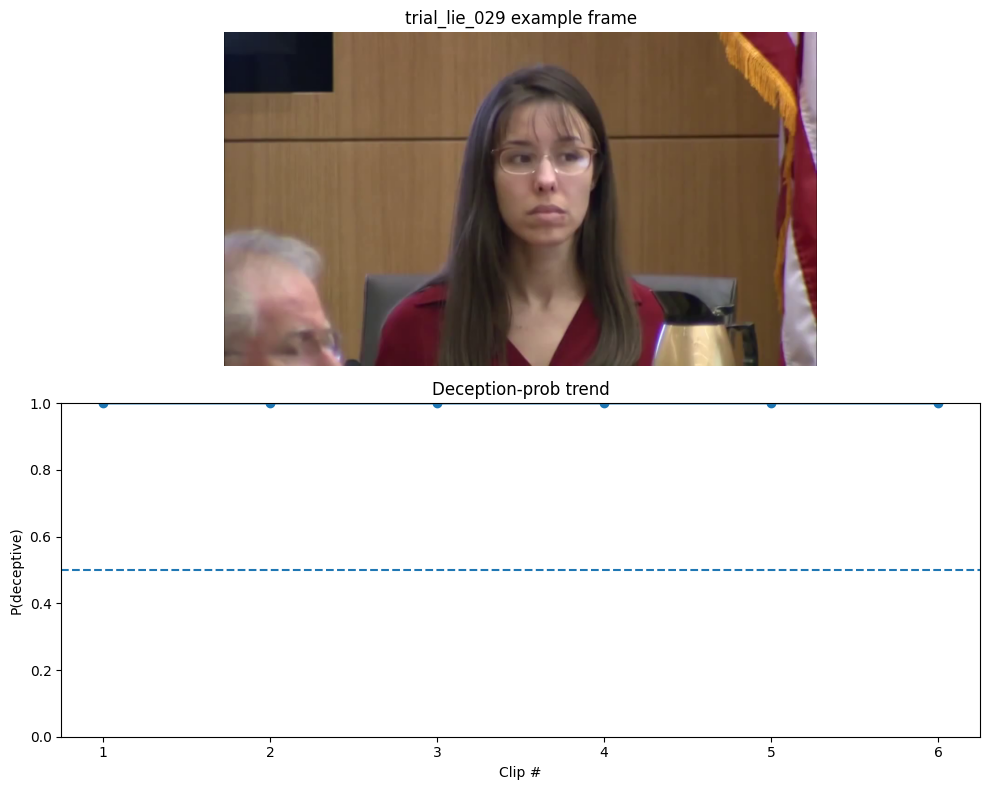


Scene: trial_truth_001
  Prediction: truthful  True: truthful  ✓
  Scene confidence: 94.82%
  Chunk‐level acc: 4/4 = 100.00%


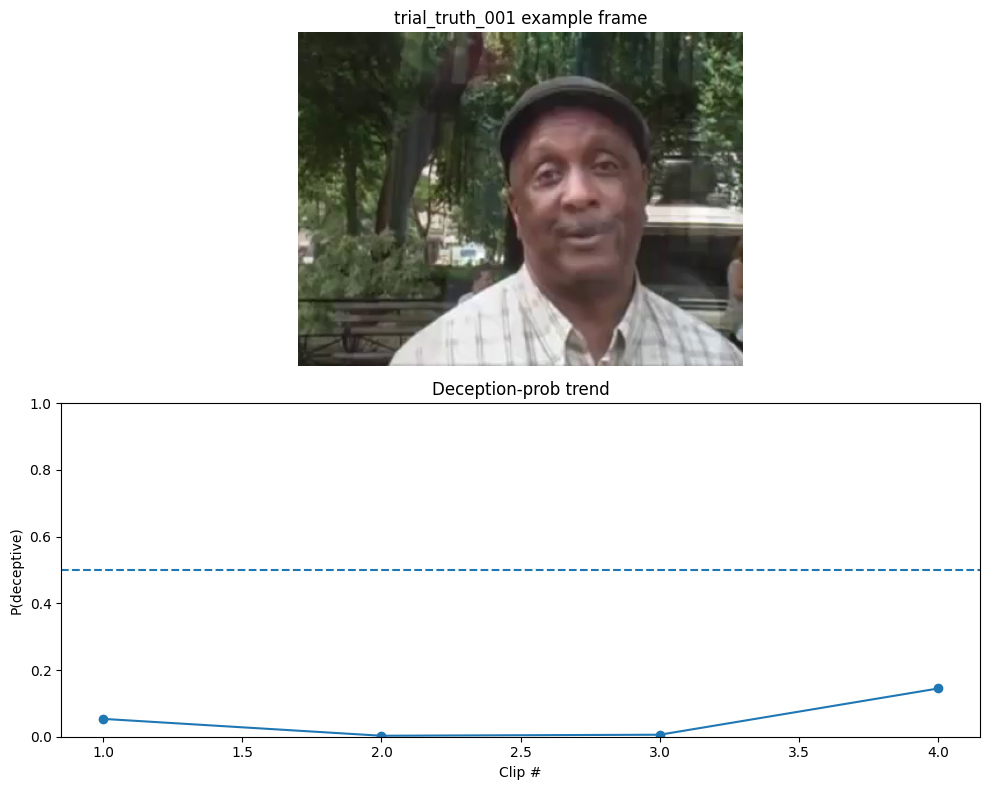


Scene: trial_truth_007
  Prediction: truthful  True: truthful  ✓
  Scene confidence: 71.40%
  Chunk‐level acc: 18/18 = 100.00%


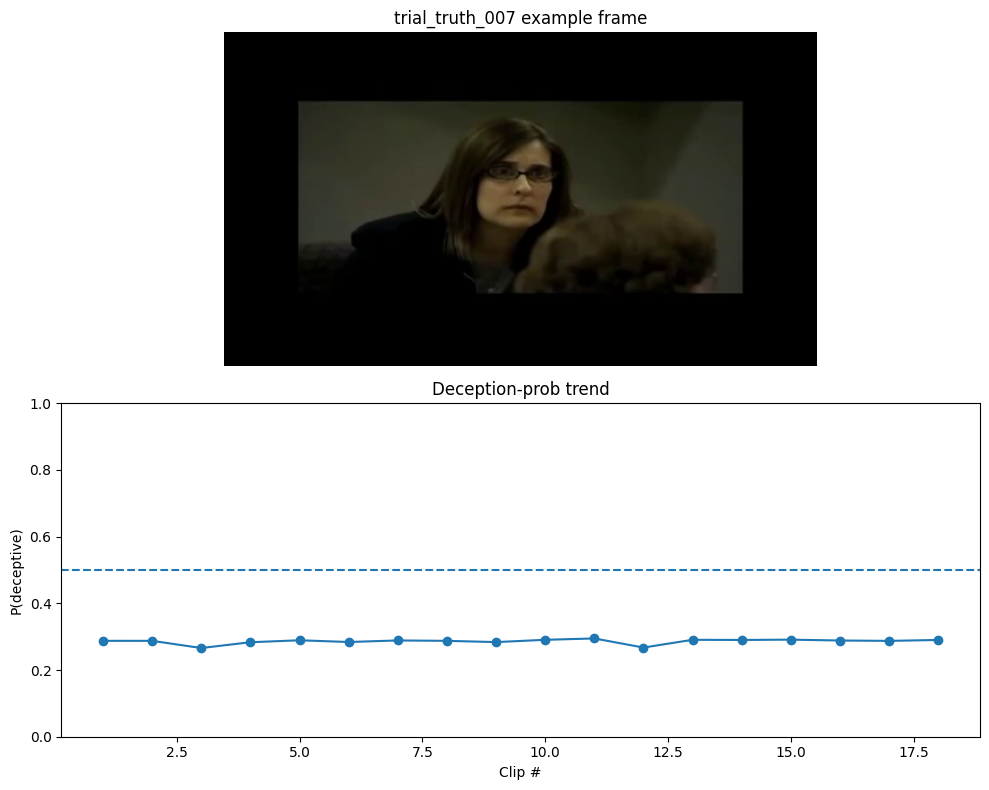


Scene: trial_truth_008
  Prediction: truthful  True: truthful  ✓
  Scene confidence: 75.02%
  Chunk‐level acc: 9/12 = 75.00%


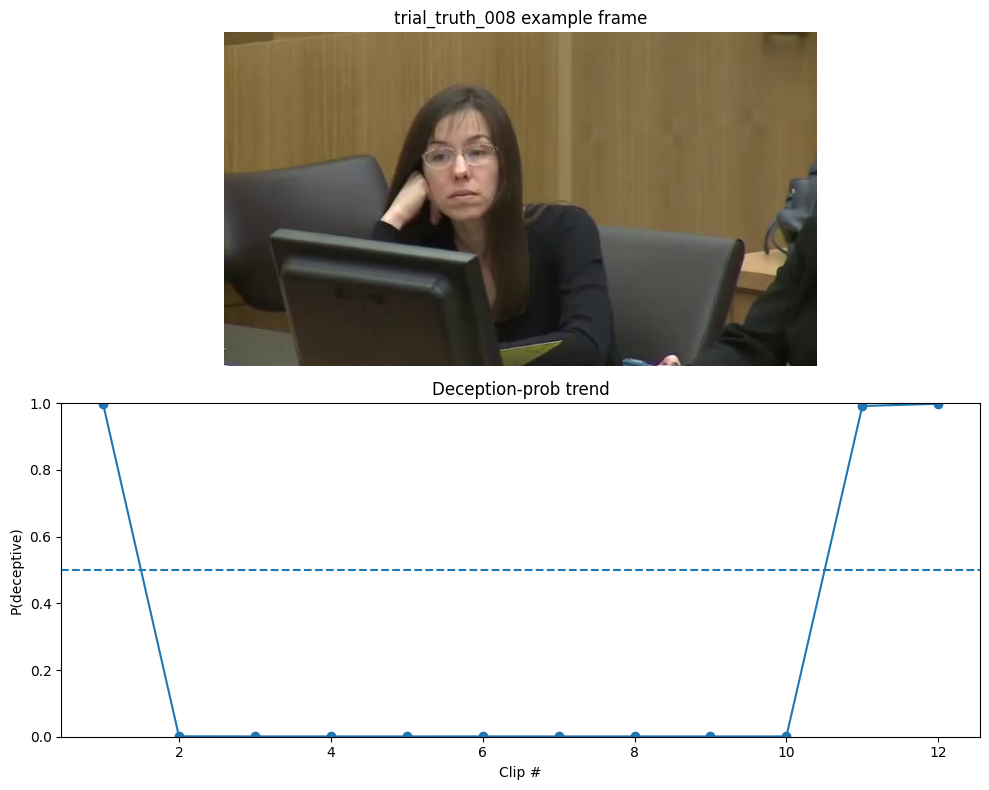


Scene: trial_truth_052
Error loading video /content/drive/MyDrive/deception_detection/test/trial_truth_052_007.mp4: Video has only 11 frames, need at least 16
  Prediction: deceptive  True: truthful  ✗
  Scene confidence: 96.48%
  Chunk‐level acc: 0/7 = 0.00%


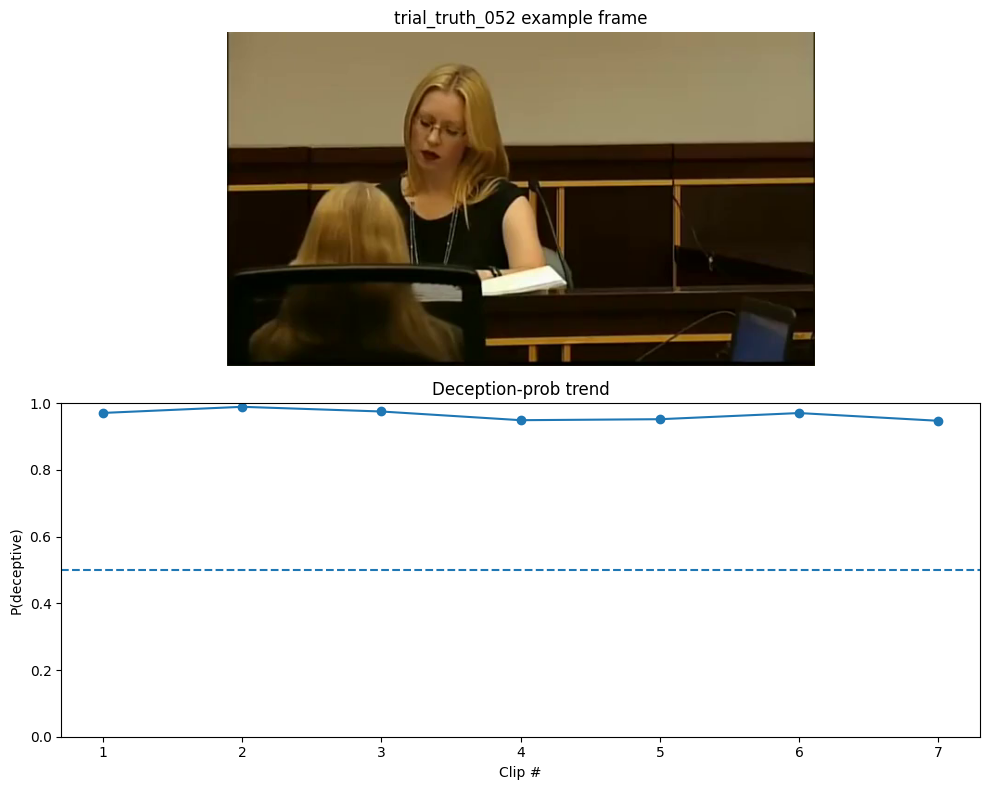


Scene: trial_truth_053
  Prediction: deceptive  True: truthful  ✗
  Scene confidence: 99.92%
  Chunk‐level acc: 0/8 = 0.00%


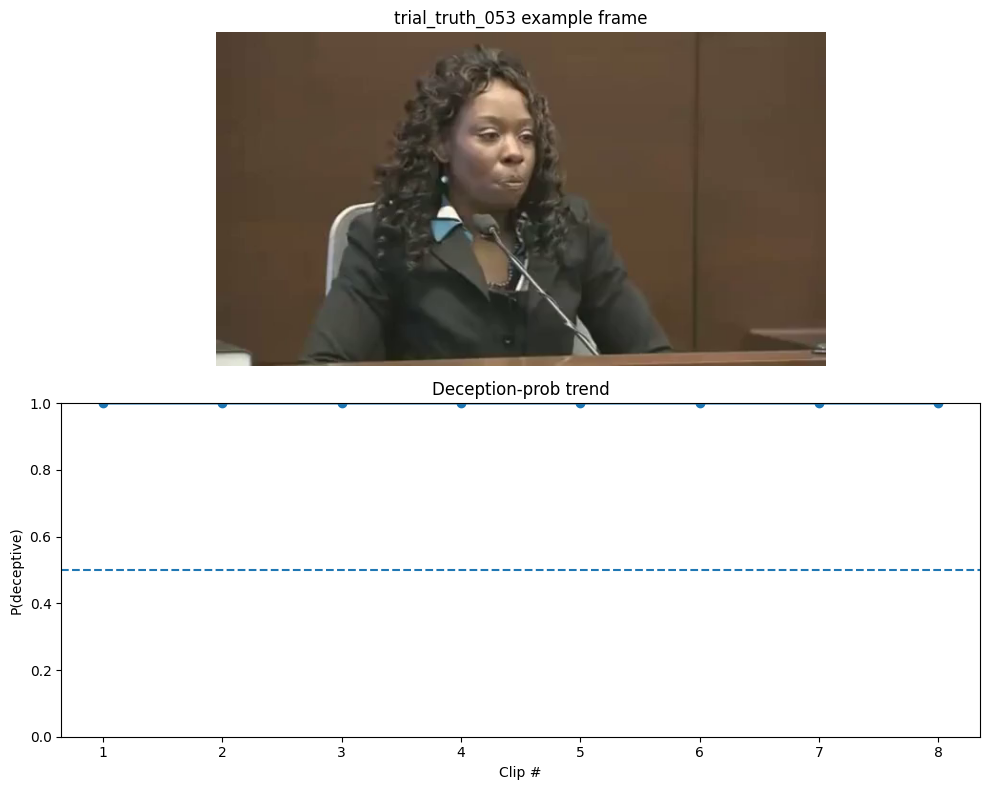


=== Summary ===
Scenes processed: 10
Scene‐level accuracy: 7/10 = 70.00%
Avg scene confidence: 89.69%
Chunks processed: 98
Chunk‐level accuracy: 77/98 = 78.57%
Misclassified scenes: trial_lie_057, trial_truth_052, trial_truth_053


In [2]:
import os
import torch
import matplotlib.pyplot as plt  # Requires matplotlib
from transformers import AutoImageProcessor, AutoModelForVideoClassification
from pathlib import Path

# Initialize model and processor
try:
    processor = AutoImageProcessor.from_pretrained(
        "NiklasTUM/videomae-base-finetuned-deception-dataset"
    )
    model = AutoModelForVideoClassification.from_pretrained(
        "NiklasTUM/videomae-base-finetuned-deception-dataset"
    )
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    print(f"Model loaded successfully on {device}")
except Exception as e:
    print(f"Error loading model: {e}")
    raise

CLASS_NAMES = ["truthful", "deceptive"]
NUM_FRAMES = 16

def load_clip(video_path):
    """Load and sample NUM_FRAMES uniformly from a video."""
    try:
        vr = VideoReader(video_path, ctx=cpu(0))
        total_frames = len(vr)
        if total_frames < NUM_FRAMES:
            raise ValueError(f"Video has only {total_frames} frames, need at least {NUM_FRAMES}")
        indices = np.linspace(0, total_frames - 1, NUM_FRAMES, dtype=int)
        clip = vr.get_batch(indices).asnumpy()
        return clip
    except Exception as e:
        print(f"Error loading video {video_path}: {e}")
        return None

def preprocess_clip(clip_frames):
    """Turn a numpy array of frames into model inputs."""
    try:
        imgs = [Image.fromarray(frame) for frame in clip_frames]
        arrays = np.stack([np.array(img) for img in imgs])
        inputs = processor(list(arrays), return_tensors="pt")
        return {k: v.to(device) for k, v in inputs.items()}
    except Exception as e:
        print(f"Error preprocessing clip: {e}")
        return None

def extract_scene_id_from_path(video_path: str) -> str:
    """
    Extracts a scene ID from the video filename.
    Assumes filenames like 'Trial_Lie_002_003.mp4' → 'Trial_Lie_002'
    """
    stem = Path(video_path).stem
    parts = stem.split('_')
    return '_'.join(parts[:3])

def analyze_with_logit_sum(clip_paths):
    """
    For a list of clip paths in one scene:
    - load & preprocess each clip
    - accumulate per-clip logits (no softmax)
    - return final scene_pred, per-clip deceptive probs for plotting,
      and all per-clip predictions for chunk-level accuracy
    """
    scene_logits = []
    deceptive_probs = []
    per_clip_preds = []
    per_clip_probs = []

    for path in clip_paths:
        clip = load_clip(path)
        if clip is None:
            continue
        inputs = preprocess_clip(clip)
        if inputs is None:
            continue
        with torch.no_grad():
            outputs = model(**inputs)
            logits = outputs.logits[0].cpu()                   # raw logits
            probs = torch.nn.functional.softmax(logits, dim=-1)
        scene_logits.append(logits)
        per_clip_preds.append(logits.argmax().item())
        per_clip_probs.append(probs)
        deceptive_probs.append(probs[1].item())

    if not scene_logits:
        return None, None, None, None

    # Sum logits across clips
    total_logits = torch.stack(scene_logits).sum(dim=0)
    scene_pred = total_logits.argmax().item()

    return scene_pred, deceptive_probs, per_clip_preds, per_clip_probs

def group_clips_by_scene(folder_path):
    """Group .mp4 files in folder by their trial ID prefix."""
    scenes = defaultdict(list)
    for fname in os.listdir(folder_path):
        if not fname.lower().endswith('.mp4'):
            continue
        scene_id = extract_scene_id_from_path(fname)
        scenes[scene_id].append(os.path.join(folder_path, fname))
    # sort each group by trailing clip index
    for sid, paths in scenes.items():
        try:
            scenes[sid] = sorted(
                paths,
                key=lambda p: int(Path(p).stem.split('_')[-1])
            )
        except:
            scenes[sid].sort()
    return scenes

# === MAIN ===

test_folder = "/content/drive/MyDrive/deception_detection/test"
if not os.path.isdir(test_folder):
    raise FileNotFoundError(f"Test folder not found at {test_folder}")

scene_clips = group_clips_by_scene(test_folder)
if not scene_clips:
    print("No scenes found; exiting.")
    exit()

mis_scenes, ok_scenes = [], []
scene_confs, scene_chunk_accs = [], []

total_chunks = correct_chunks = 0

for scene_id, clips in scene_clips.items():
    print(f"\nScene: {scene_id}")
    result = analyze_with_logit_sum(clips)
    if result[0] is None:
        print("  could not process any clips; skipping")
        continue

    pred, probs_for_plot, clip_preds, clip_probs = result

    # ground truth
    lbl = scene_id.split('_')[1].lower()
    true_lbl = 1 if lbl == "lie" else 0

    # chunk‐level acc & overall counters
    n = len(clip_preds)
    c = sum(int(p == true_lbl) for p in clip_preds)
    total_chunks += n
    correct_chunks += c
    scene_chunk_accs.append(c / n)

    # scene‐level confidence: mean of selected‐class probs
    scene_conf = float(torch.tensor([clip_probs[i][pred] for i in range(n)]).mean())
    scene_confs.append(scene_conf)

    # track scene‐level correctness
    if pred == true_lbl:
        ok_scenes.append(scene_id)
        verdict = "✓"
    else:
        mis_scenes.append(scene_id)
        verdict = "✗"

    # report
    print(f"  Prediction: {CLASS_NAMES[pred]}  True: {CLASS_NAMES[true_lbl]}  {verdict}")
    print(f"  Scene confidence: {scene_conf:.2%}")
    print(f"  Chunk‐level acc: {c}/{n} = {scene_chunk_accs[-1]:.2%}")

    # visualize first clip example + deception‐prob trend
    example = clips[0]
    frames = load_clip(example)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    ax1.imshow(frames[0]); ax1.axis('off')
    ax1.set_title(f"{scene_id} example frame")
    ax2.plot(range(1, len(probs_for_plot)+1), probs_for_plot, marker='o')
    ax2.axhline(0.5, linestyle='--')
    ax2.set_ylim(0,1)
    ax2.set_xlabel("Clip #"); ax2.set_ylabel("P(deceptive)")
    ax2.set_title("Deception‐prob trend")
    plt.tight_layout()
    plt.show()

# final stats
n_scenes = len(ok_scenes) + len(mis_scenes)
scene_acc = len(ok_scenes)/n_scenes if n_scenes else 0.0
avg_conf = sum(scene_confs)/len(scene_confs) if scene_confs else 0.0
chunk_acc = correct_chunks/total_chunks if total_chunks else 0.0

print("\n=== Summary ===")
print(f"Scenes processed: {n_scenes}")
print(f"Scene‐level accuracy: {len(ok_scenes)}/{n_scenes} = {scene_acc:.2%}")
print(f"Avg scene confidence: {avg_conf:.2%}")
print(f"Chunks processed: {total_chunks}")
print(f"Chunk‐level accuracy: {correct_chunks}/{total_chunks} = {chunk_acc:.2%}")
if mis_scenes:
    print("Misclassified scenes:", ", ".join(mis_scenes))


Model loaded successfully on cuda
Skipping Tamai scene: Ronda_9_Tamai_truth_1.mp4
Skipping Tamai scene: Ronda_9_Tamai_truth_2.mp4
Skipping Tamai scene: Ronda_9_Tamai_truth_3.mp4
Skipping Tamai scene: Ronda_9_Tamai_truth_4.mp4
Skipping Tamai scene: Ronda_9_Tamai_truth_5.mp4
Skipping Tamai scene: Ronda_9_Tamai_truth_6.mp4
Skipping Tamai scene: Ronda_9_Tamai_truth_7.mp4
Skipping Tamai scene: Ronda_9_Tamai_truth_8.mp4
Skipping Tamai scene: Ronda_9_Tamai_truth_9.mp4
Skipping Tamai scene: Ronda_9_Tamai_truth_10.mp4
Skipping Tamai scene: Ronda_9_Tamai_truth_11.mp4
Skipping Tamai scene: Ronda_9_Tamai_truth_12.mp4
Skipping Tamai scene: Ronda_9_Tamai_truth_13.mp4
Skipping Tamai scene: Ronda_9_Tamai_truth_14.mp4
Skipping Tamai scene: Ronda_9_Tamai_truth_15.mp4
Skipping Tamai scene: Ronda_9_Tamai_truth_16.mp4
Skipping Tamai scene: Ronda_9_Tamai_truth_17.mp4
Skipping Tamai scene: Ronda_9_Tamai_truth_18.mp4
Skipping Tamai scene: Ronda_9_Tamai_truth_19.mp4
Skipping Tamai scene: Ronda_9_Tamai_truth_20

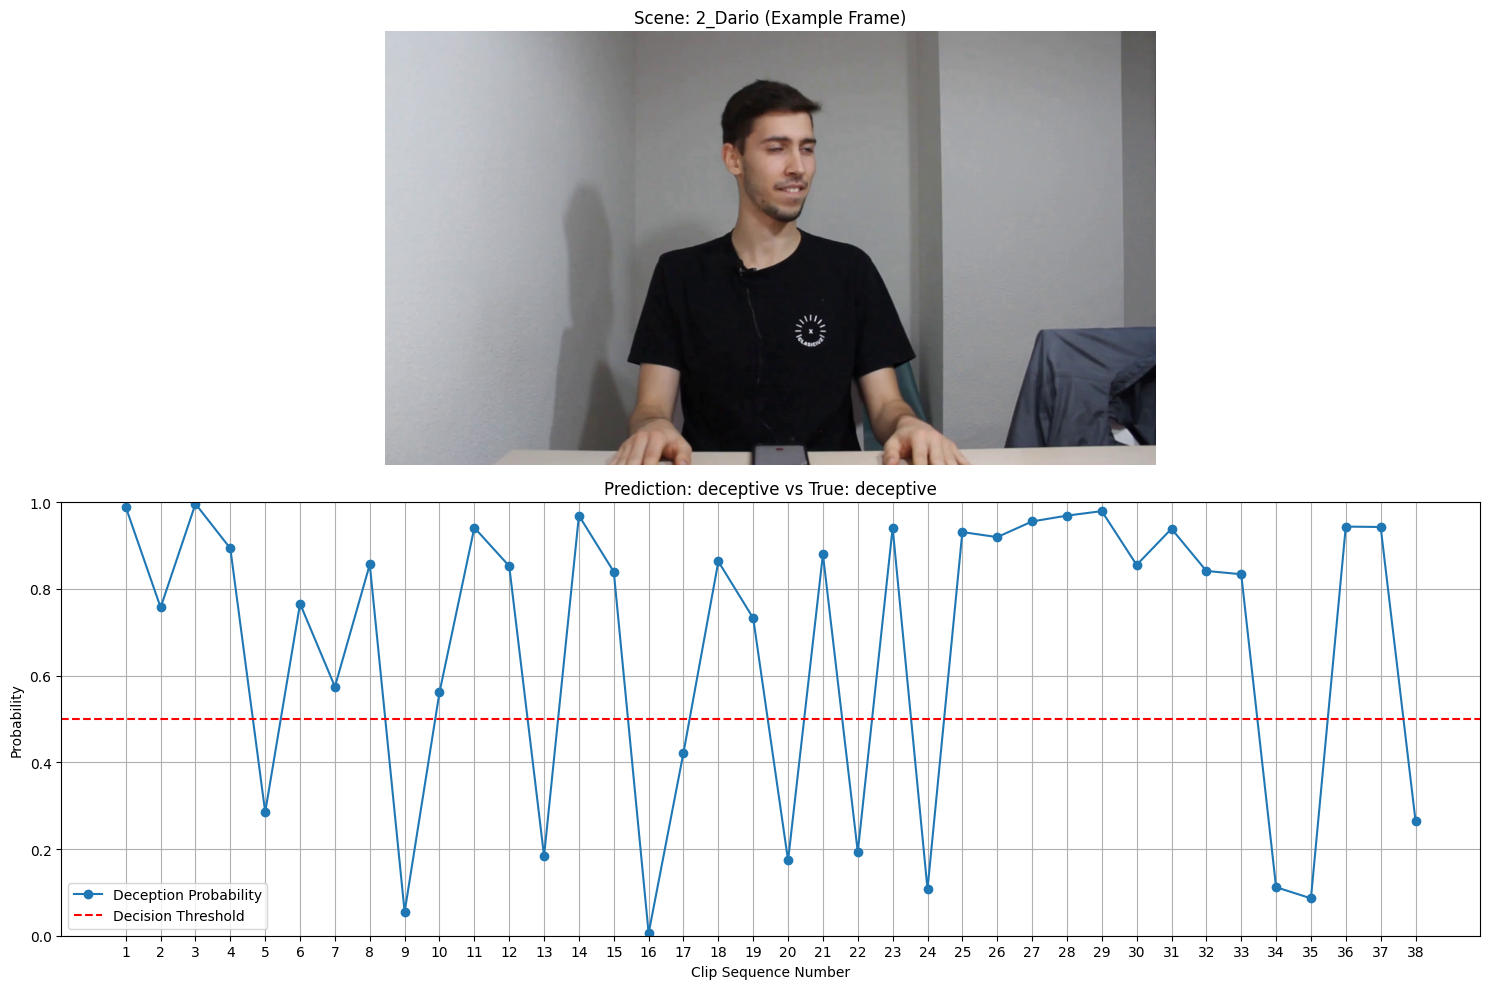

✅ Correct: deceptive

Analyzing scene: 1_Miguel


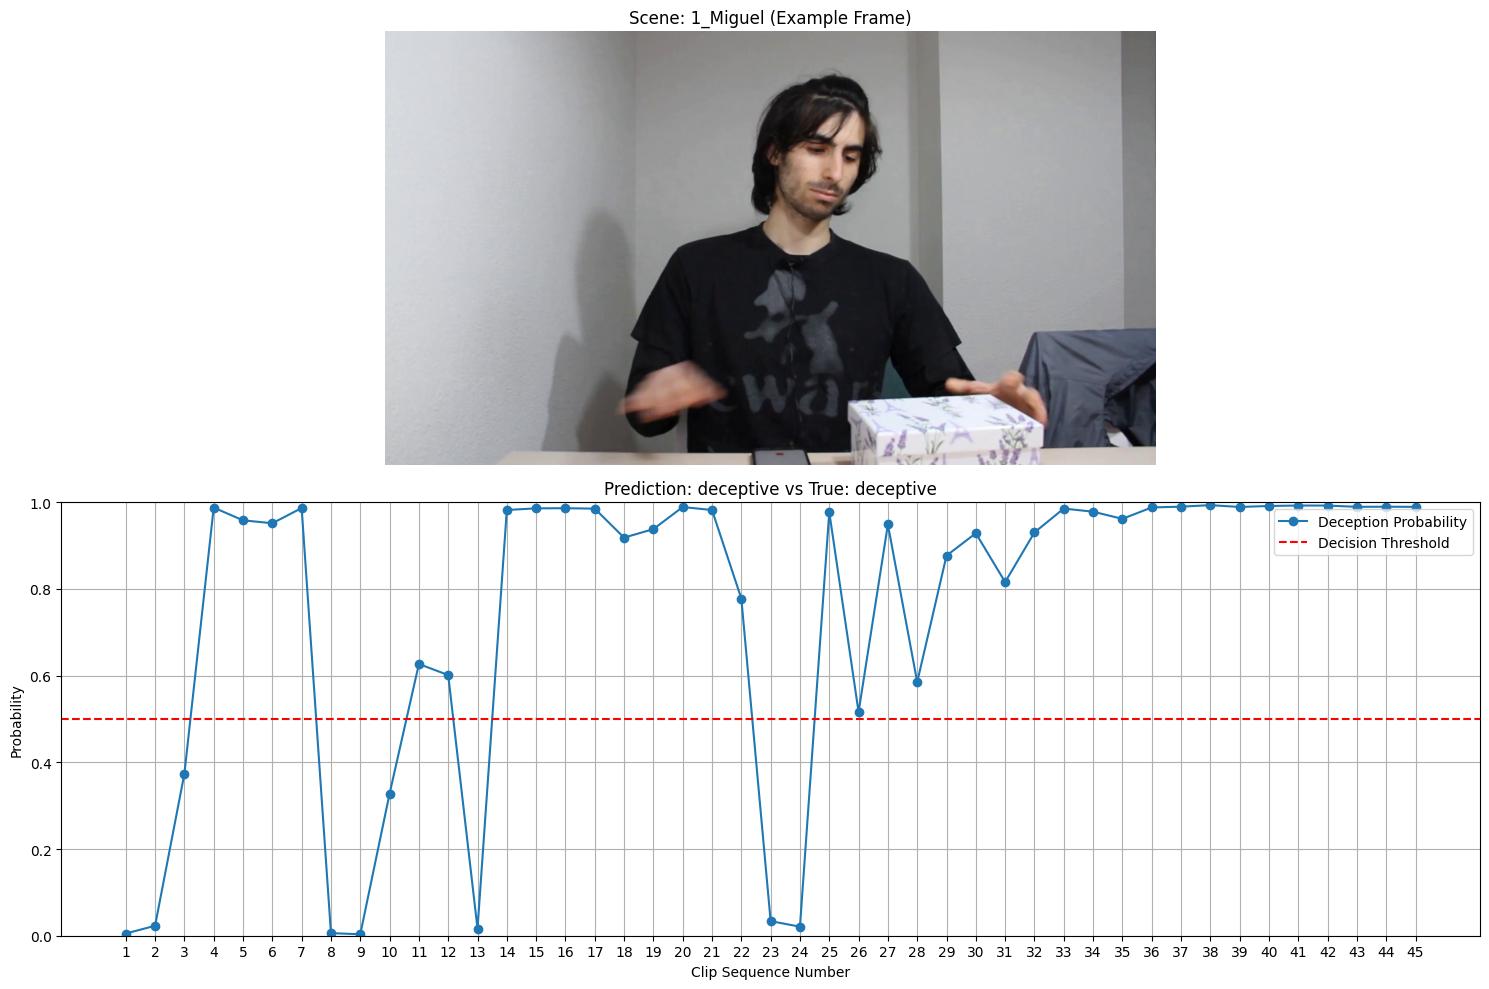

✅ Correct: deceptive

Analyzing scene: 3_Maria


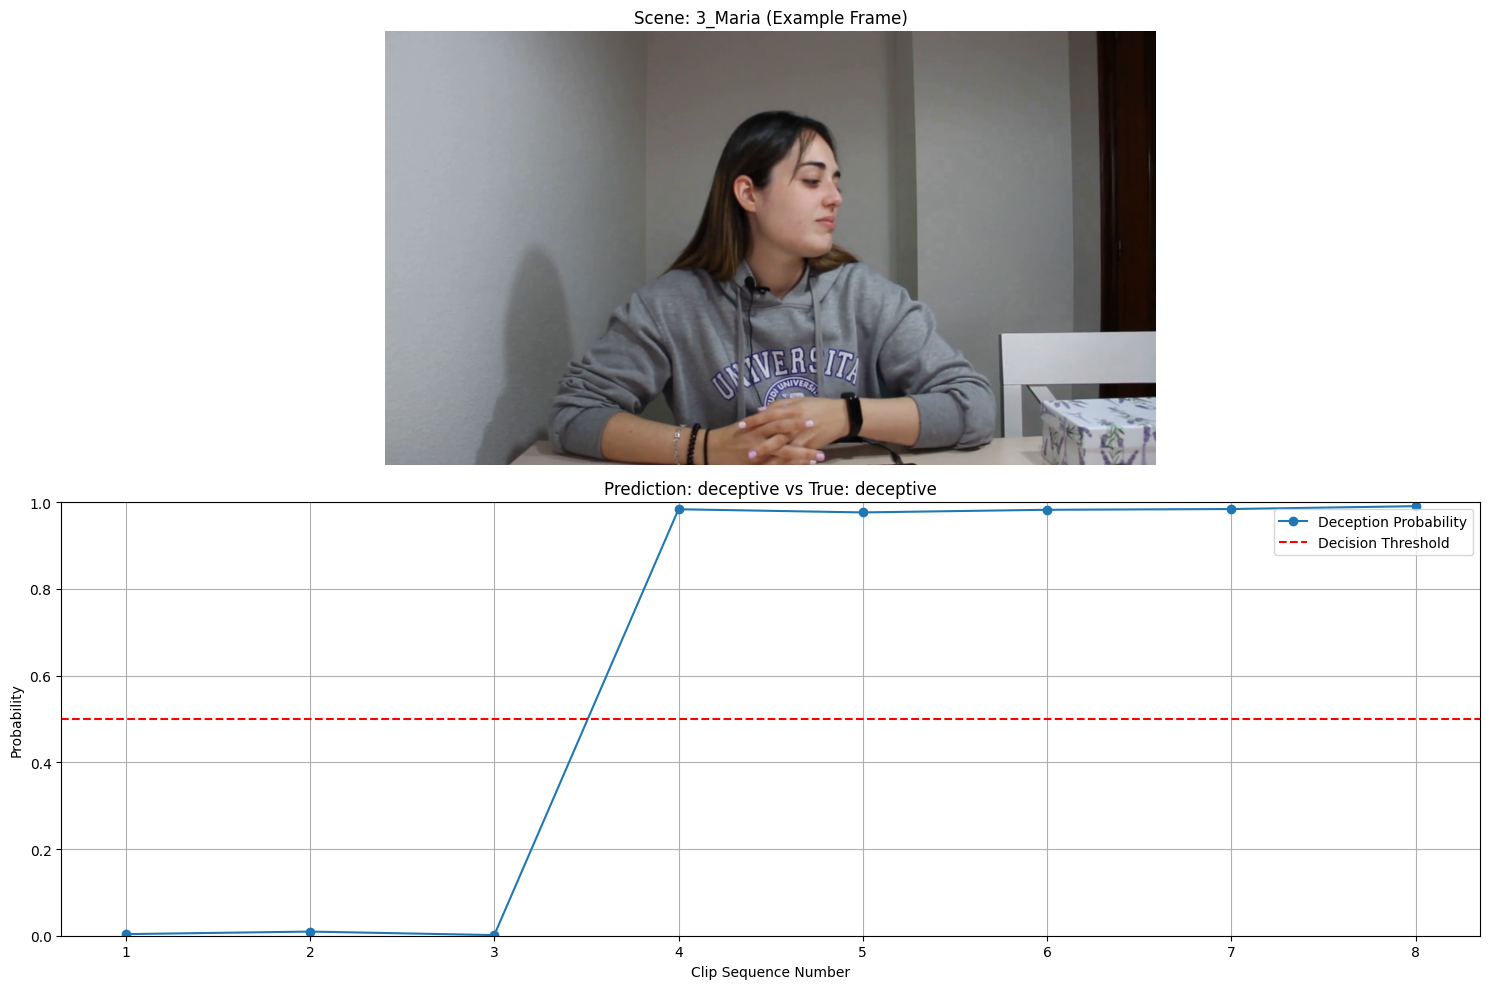

✅ Correct: deceptive

Analyzing scene: 2_Maria
Error loading video /content/drive/MyDrive/deception_detection/bol_3_seconds/Ronda_2_Maria_lie_36.mp4: Video has only 5 frames, need at least 16


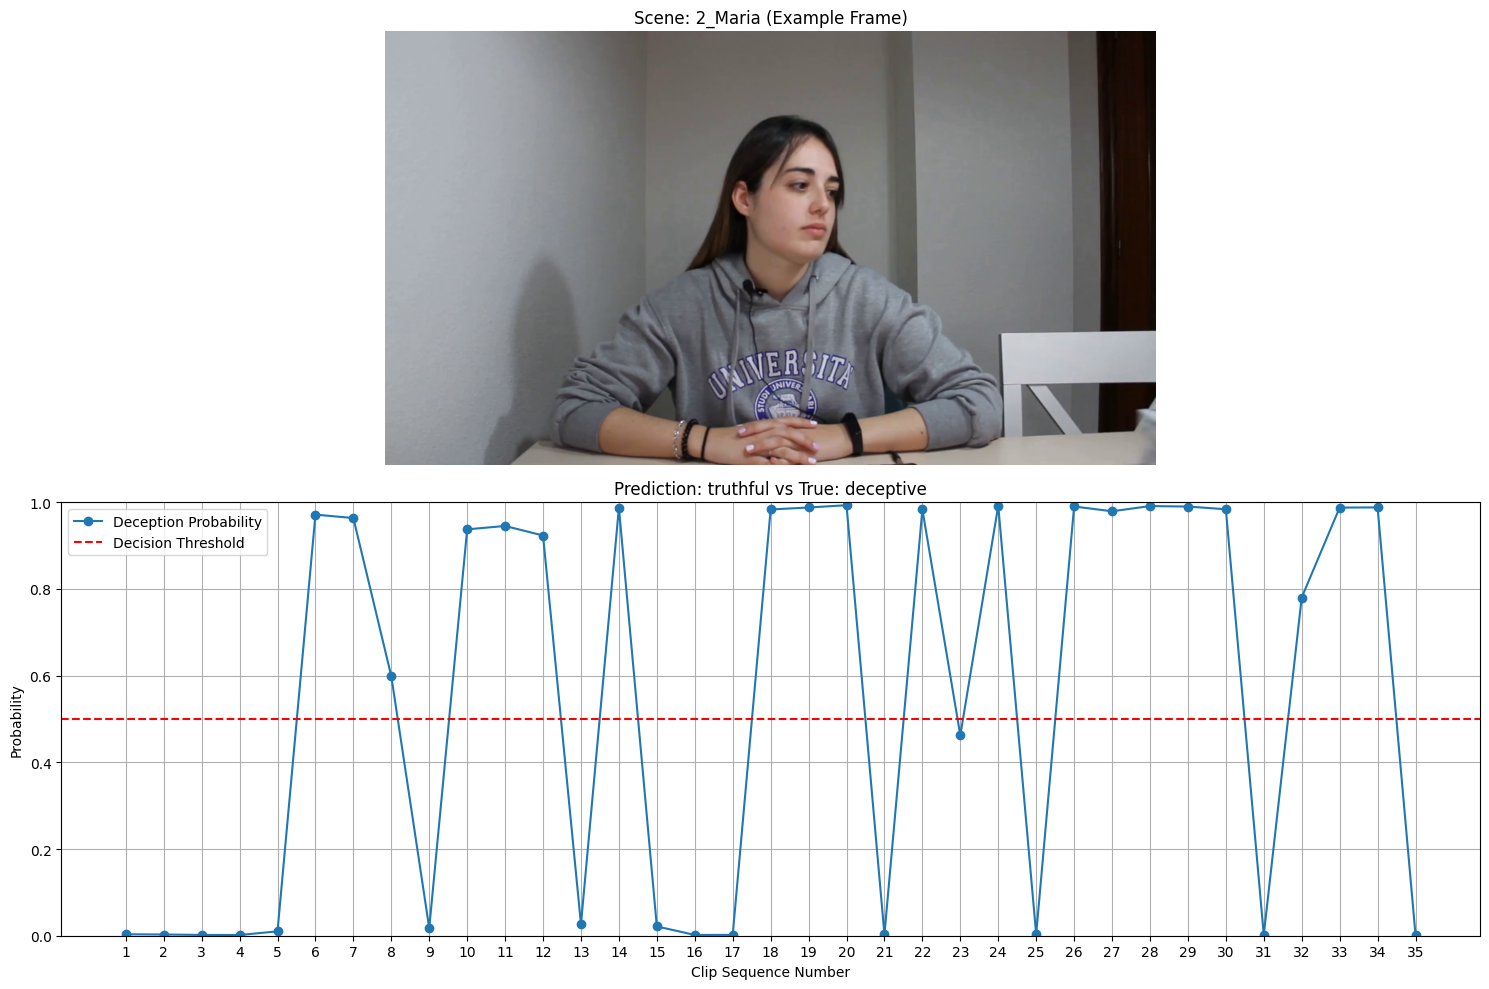

❌ Misclassified: Predicted truthful | True deceptive

Analyzing scene: 1_Maria


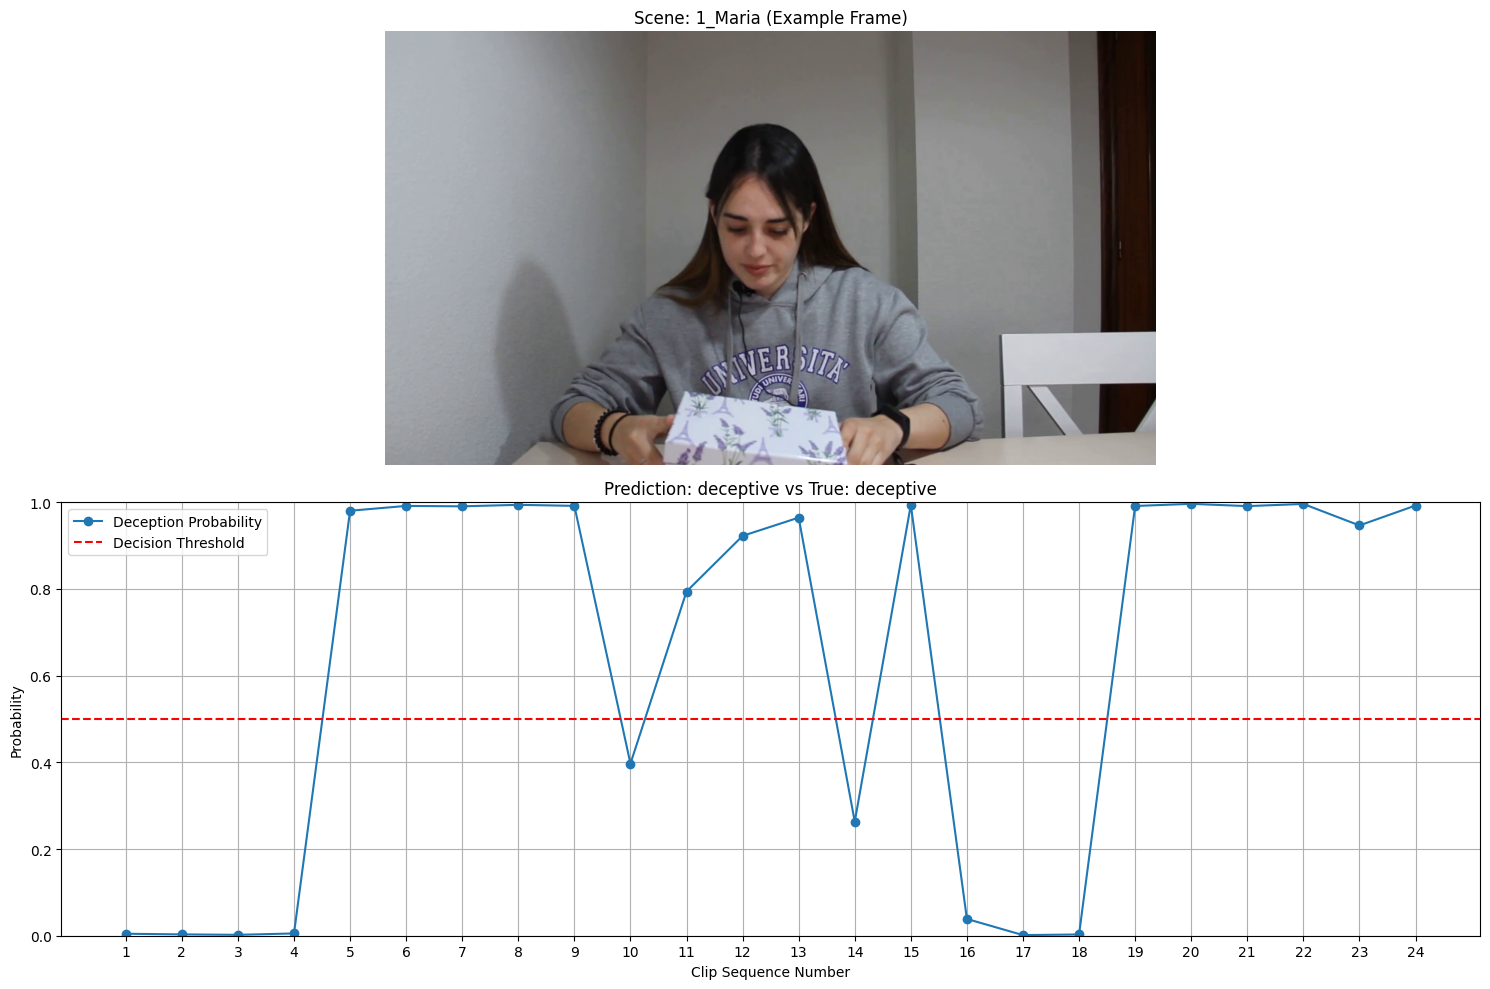

✅ Correct: deceptive

Analyzing scene: 1_Dario


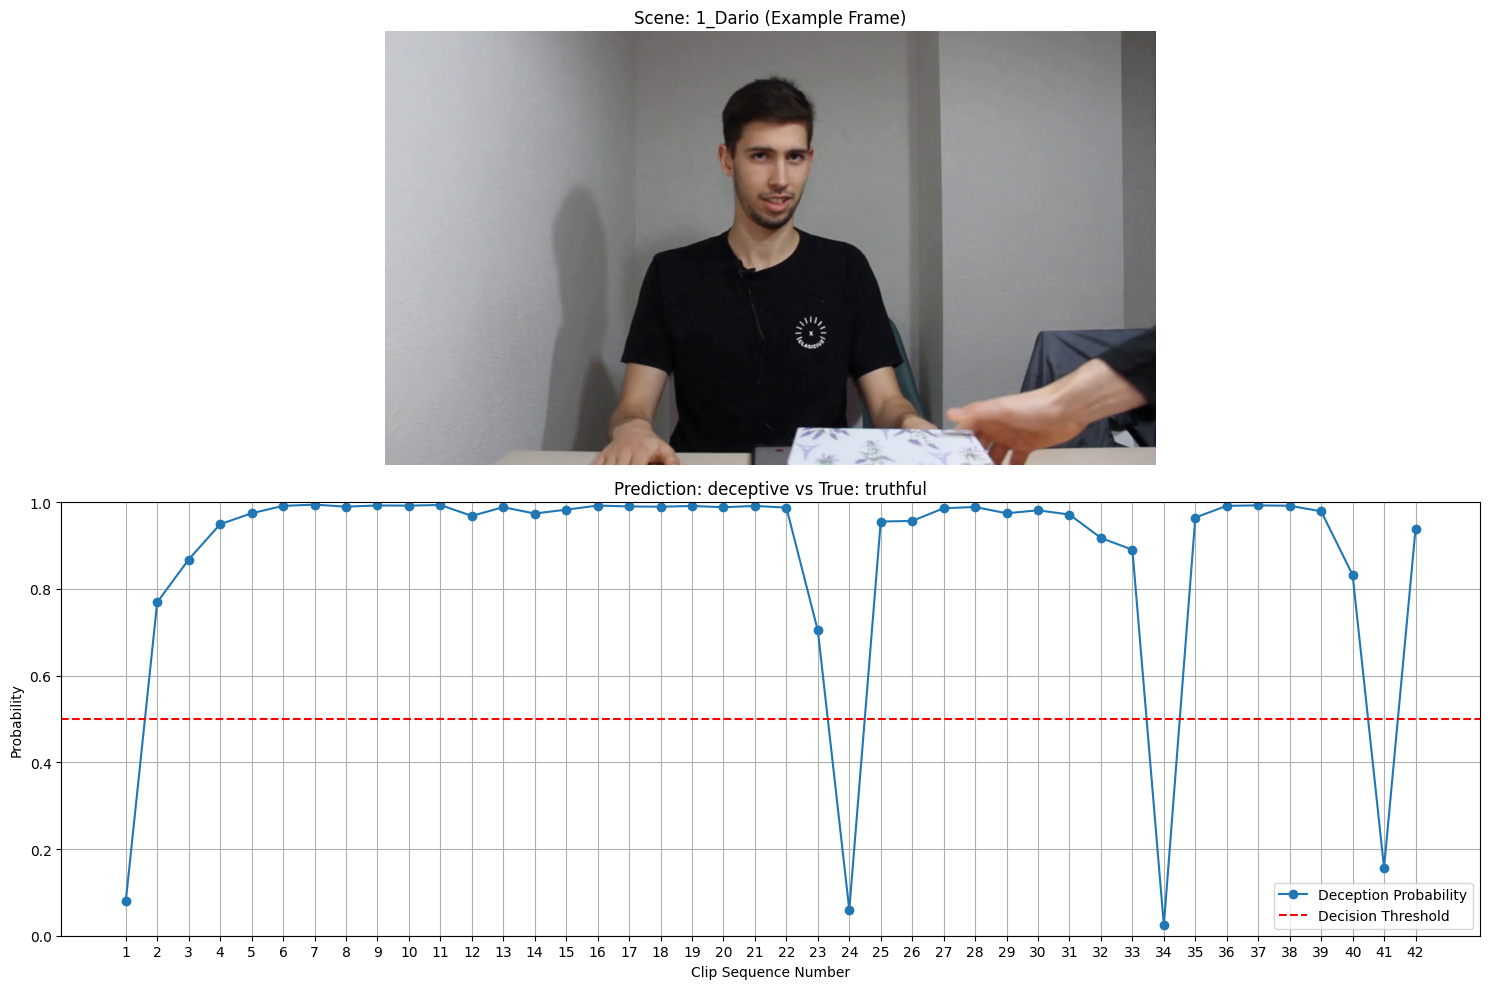

❌ Misclassified: Predicted deceptive | True truthful

Analyzing scene: 2_Miguel


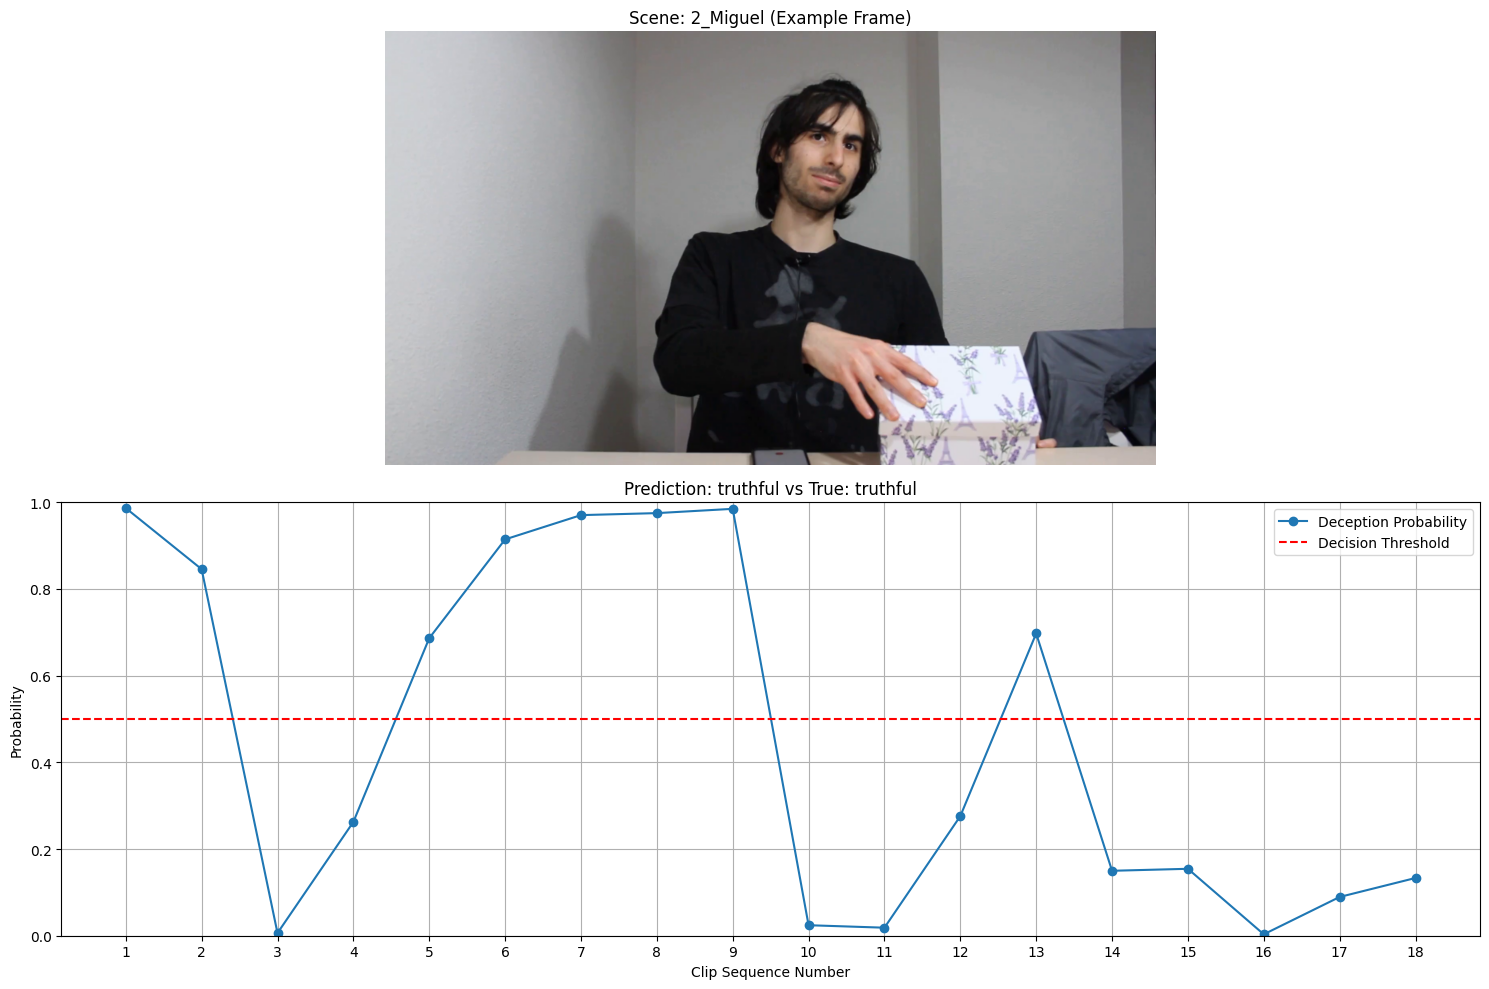

✅ Correct: truthful

Analyzing scene: 3_Dario


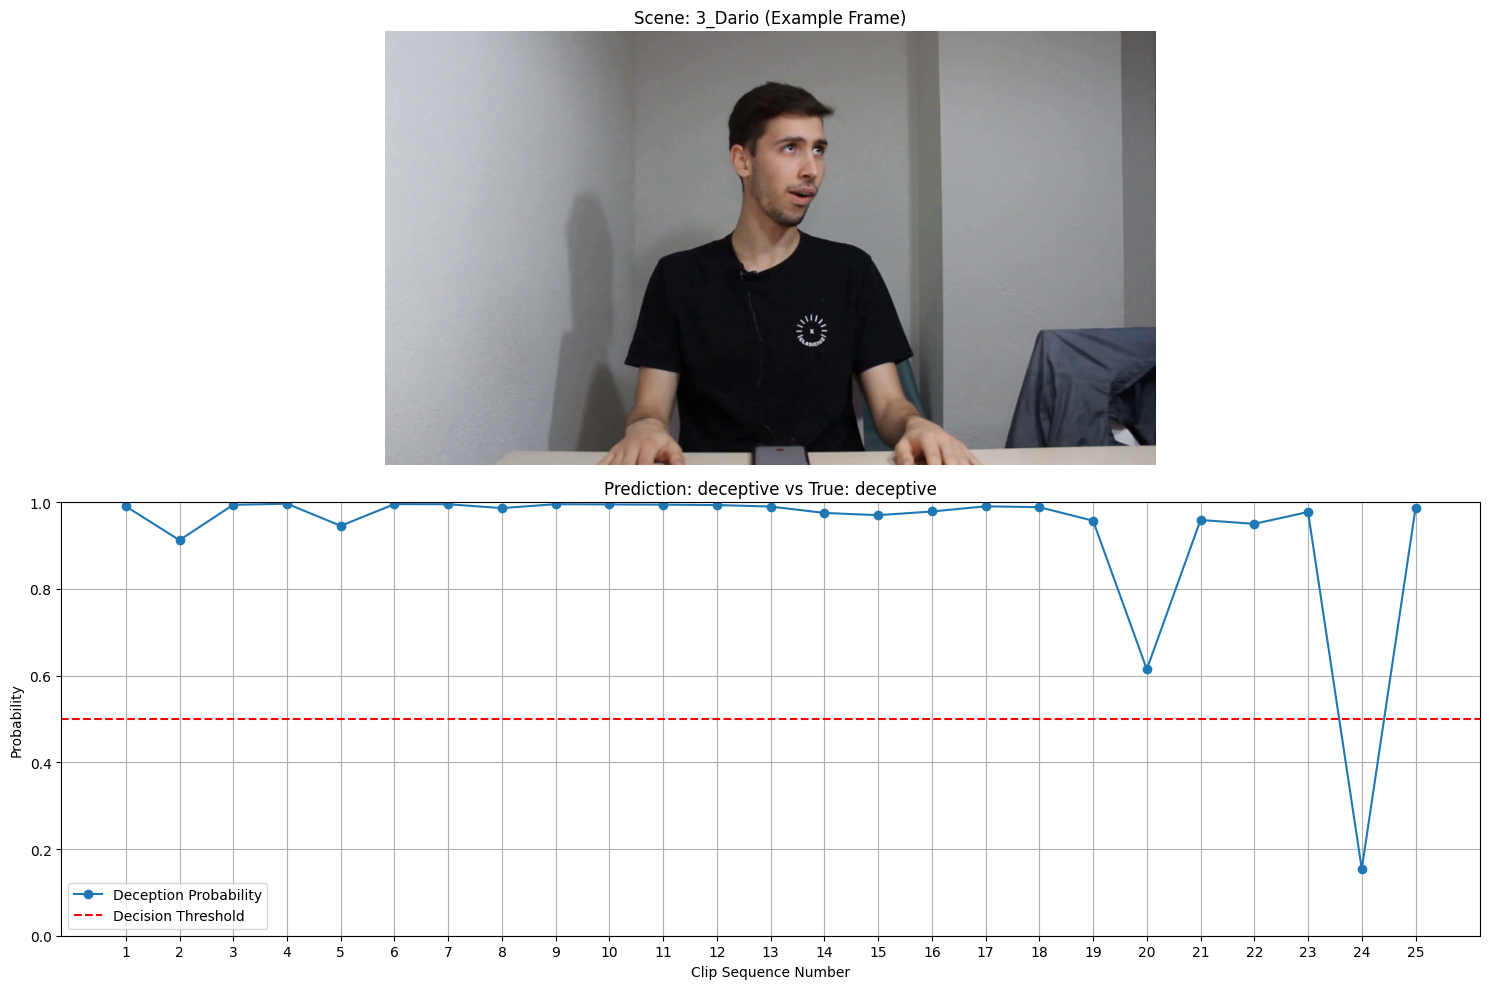

✅ Correct: deceptive

=== Analysis Complete ===
Processed scenes: 8
Correct: 6 (75.0%)
Errors: 2

Misclassified Scenes:
 - 2_Maria
 - 1_Dario


In [3]:
import os
import torch
from decord import VideoReader, cpu
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from transformers import AutoImageProcessor, AutoModelForVideoClassification
from collections import defaultdict

# Initialize model and processor
try:
    processor = AutoImageProcessor.from_pretrained("NiklasTUM/videomae-base-finetuned-deception-dataset")
    model = AutoModelForVideoClassification.from_pretrained("NiklasTUM/videomae-base-finetuned-deception-dataset")
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    print(f"Model loaded successfully on {device}")
except Exception as e:
    print(f"Error loading model: {e}")
    raise

CLASS_NAMES = ["truthful", "deceptive"]
NUM_FRAMES = 16

def load_clip(video_path):
    """Load and sample frames from a pre-chunked video"""
    try:
        vr = VideoReader(video_path, ctx=cpu(0))
        total_frames = len(vr)

        if total_frames < NUM_FRAMES:
            raise ValueError(f"Video has only {total_frames} frames, need at least {NUM_FRAMES}")

        indices = np.linspace(0, total_frames-1, NUM_FRAMES, dtype=int)
        clip = vr.get_batch(indices).asnumpy()
        return clip
    except Exception as e:
        print(f"Error loading video {video_path}: {e}")
        return None

def preprocess_clip(clip_frames, processor):
    """Preprocess a single clip"""
    try:
        frames = [Image.fromarray(frame) for frame in clip_frames]
        frame_arrays = np.stack([np.array(frame) for frame in frames])
        inputs = processor(list(frame_arrays), return_tensors="pt")
        return {k: v.to(device) for k, v in inputs.items()}
    except Exception as e:
        print(f"Error preprocessing clip: {e}")
        return None

def predict_clip(clip_input, model):
    """Get predictions for a single clip"""
    if clip_input is None:
        return None, None

    with torch.no_grad():
        outputs = model(**clip_input)
        logits = outputs.logits[0]
        probs = torch.nn.functional.softmax(logits, dim=-1)
    return logits, probs

def analyze_scene(clip_paths, aggregation="logit-sum"):
    """Analyze a scene and return its prediction + visualization data"""
    all_logits = []
    all_probs_full = []  # Store full probability tensors for aggregation
    deceptive_probs_scalar = []  # Store scalar deception probabilities for plotting

    for clip_path in clip_paths:
        clip = load_clip(clip_path)
        if clip is None:
            continue

        inputs = preprocess_clip(clip, processor)
        if inputs is None:
            continue

        logits, probs = predict_clip(inputs, model)
        if logits is not None:
            all_logits.append(logits.cpu())
            all_probs_full.append(probs.cpu())
            deceptive_probs_scalar.append(probs[1].item())  # Store deception probability

    if not all_logits:
        return None, None, None, None

    # Aggregate predictions
    if aggregation == "logit-sum":
        summed_logits = torch.stack(all_logits).sum(dim=0)
        scene_pred = summed_logits.argmax().item()
    elif aggregation == "softmax-sum":
        summed_probs_tensor = torch.stack(all_probs_full).sum(dim=0)
        scene_pred = summed_probs_tensor.argmax().item()
    else:  # majority voting
        clip_preds = [p.argmax().item() for p in all_probs_full]
        scene_pred = max(set(clip_preds), key=clip_preds.count)

    return scene_pred, deceptive_probs_scalar, clip_paths[0] if clip_paths else None, all_probs_full

def group_clips_by_scene(folder_path):
    """Group clip files by their scene (x and name components)"""
    scene_clips = defaultdict(list)

    for fname in os.listdir(folder_path):
        if not fname.lower().endswith('.mp4'):
            continue

        try:
            basename = os.path.splitext(fname)[0]
            parts = basename.split('_')

            # Validate filename format: Ronda_x_name_lie_uv
            if len(parts) < 5 or parts[0] != 'Ronda':
                print(f"Skipping {fname}: invalid format")
                continue

            # Extract scene components (x and name)
            x = parts[1]
            name_parts = parts[2:-2]  # Exclude label and sequence number
           # Skip scenes with name 'Tamai'
            if '_'.join(name_parts) == 'Tamai' or '_'.join(name_parts) == 'Adri':  # Properly check joined name
                print(f"Skipping Tamai scene: {fname}")
                continue

            if not name_parts:
                print(f"Skipping {fname}: missing name components")
                continue

            scene_id = f"{x}_{'_'.join(name_parts)}"
            scene_clips[scene_id].append(os.path.join(folder_path, fname))
        except Exception as e:
            print(f"Error processing {fname}: {e}")
            continue

    # Sort clips by their sequence number (last part of filename)
    for scene_id in scene_clips:
        try:
            scene_clips[scene_id].sort(key=lambda path: int(
                os.path.splitext(os.path.basename(path))[0].split('_')[-1]
            ))
        except (ValueError, IndexError):
            print(f"Warning: Couldn't sort clips for {scene_id}")
            scene_clips[scene_id].sort()

    return scene_clips

# Main execution
test_folder = "/content/drive/MyDrive/deception_detection/bol_3_seconds" # Or bol for 5 second versions
if not os.path.isdir(test_folder):
    print(f"Error: Test folder not found at {test_folder}")
    raise SystemExit

scene_clips = group_clips_by_scene(test_folder)

if not scene_clips:
    print(f"No scenes found in {test_folder}")
    raise SystemExit

misclassified_scenes = []
correctly_classified_scenes = []

for scene_id, clip_paths in scene_clips.items():
    print(f"\nAnalyzing scene: {scene_id}")
    scene_pred, deceptive_probs, first_clip_path, _ = analyze_scene(clip_paths)

    # Extract ground truth from first clip's filename
    try:
        first_clip_name = os.path.basename(clip_paths[0])
        label_str = first_clip_name.split('_')[-2].lower()  # Get 'lie' or 'truth'
        true_label = 1 if label_str == "lie" else 0
    except Exception as e:
        print(f"Label extraction failed for {scene_id}: {e}")
        continue

    # Visualization
    if first_clip_path and deceptive_probs:
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

        # Show first frame
        first_clip_frames = load_clip(first_clip_path)
        if first_clip_frames is not None and len(first_clip_frames) > 0:
            ax1.imshow(first_clip_frames[0])
            ax1.axis('off')
            ax1.set_title(f'Scene: {scene_id} (Example Frame)')
        else:
            ax1.set_title(f'Scene: {scene_id} (Frame load failed)')
            ax1.axis('off')

        # Plot probability trend
        ax2.plot(range(1, len(deceptive_probs)+1), deceptive_probs,
                marker='o', label='Deception Probability')
        ax2.axhline(y=0.5, color='r', linestyle='--', label='Decision Threshold')
        ax2.set_xlabel('Clip Sequence Number')
        ax2.set_ylabel('Probability')
        ax2.set_title(f'Prediction: {CLASS_NAMES[scene_pred]} vs True: {CLASS_NAMES[true_label]}')
        ax2.set_xticks(range(1, len(deceptive_probs)+1))
        ax2.set_ylim(0, 1)
        ax2.grid(True)
        ax2.legend()

        plt.tight_layout()
        plt.show()

    # Track results
    if scene_pred != true_label:
        misclassified_scenes.append(scene_id)
        print(f"❌ Misclassified: Predicted {CLASS_NAMES[scene_pred]} | True {CLASS_NAMES[true_label]}")
    else:
        correctly_classified_scenes.append(scene_id)
        print(f"✅ Correct: {CLASS_NAMES[scene_pred]}")

# Final statistics
print("\n=== Analysis Complete ===")
total = len(correctly_classified_scenes) + len(misclassified_scenes)
print(f"Processed scenes: {total}")
print(f"Correct: {len(correctly_classified_scenes)} ({len(correctly_classified_scenes)/total:.1%})")
print(f"Errors: {len(misclassified_scenes)}")

if misclassified_scenes:
    print("\nMisclassified Scenes:")
    for scene in misclassified_scenes:
        print(f" - {scene}")